
Problem 4.1

F(w_LS)= 217.48452613173978  on training data
F(w_0)= 78885.82819617869  on training data
F(w_LS)= 294.0683698939917  on testing data

Problem 4.2

Final objective value for lr=5e-05:1816.6730600470137
Final objective value for lr=0.0005:217.48627940291124
Final objective value for lr=0.0007:1043492429.2541482


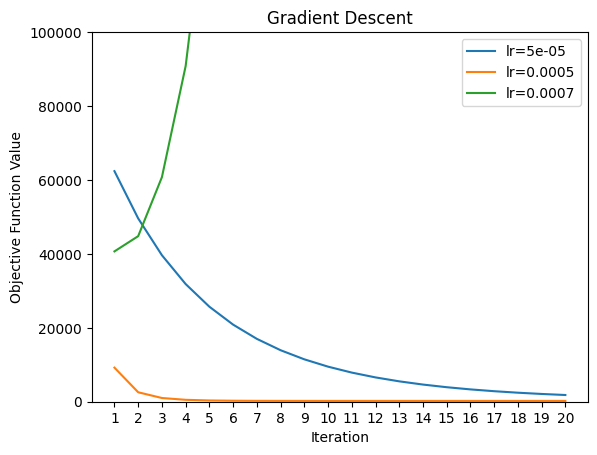


Problem 4.3

Final objective value for lr=0.0005:12486.174492437207
Final objective value for lr=0.005:443.1849419931797
Final objective value for lr=0.01:267573.61227480625


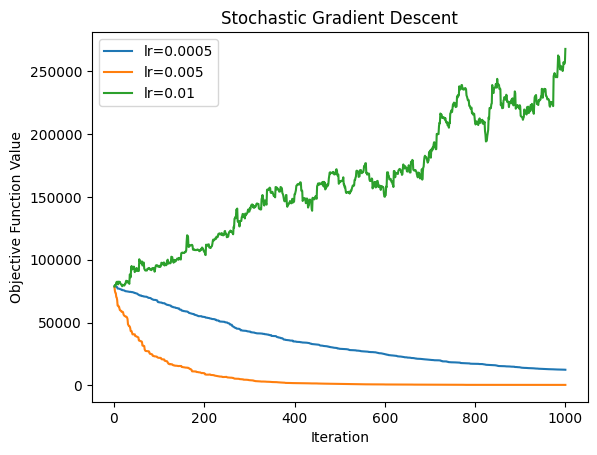

In [6]:
import numpy as np
import json
import collections
import matplotlib.pyplot as plt

np.random.seed(42) ## random seed fixed 
d = 100 # dimensions of data
n = 1000 # number of data points
X = np.random.normal(0,1, size=(n,d))
X_test = np.random.normal(0,1,size=(n,d)) 
w_true = np.random.normal(0,1, size=(d,1))
y = X.dot(w_true) + np.random.normal(0,0.5,size=(n,1))
y_test = X_test.dot(w_true) + np.random.normal(0,0.5,size=(n,1))

#########   Do not change the code above  ############
######################################################

def square_loss(w,X,y):
    """
    Implement total squared error given weight w, dataset (X,y)
    Inputs:
    - w: weight for the linear function
    - X: dataset of size (n,d)
    - y: label of size (n,1) 
    Returns:
    - loss: total squared error of w on dataset (X,y)
    """
    ################################
    ##     Write your code here   ##
    
    # The total squared error of w can be written as F(w) sum i=1 to n fi(w), where fi(w) = (w^T xi − yi)2 denotes the squared error of the ith data point.
    # 1d w^T and W remain the same 
    
    residuals = X.dot(w) - y
    loss = np.sum(residuals**2)
    
    return loss
    ################################


#### Implement closed-form solution given dataset (X,y)
def closed_form(X,y):
    """
    Implement closed-form solution given dataset (X,y)
    Inputs:
    - X: dataset of size (n,d)
    - y: label of size (n,1) 
    Returns:
    - w_LS: closed form solution of the weight
    - loss: total squared error of w_LS on dataset (X,y)
    """
    ################################
    ##     Write your code here   ##
    
    # wLS = (X^T X)^−1 X^T y 
    
    X_transpose = np.transpose(X)  # X^T
    X_transpose_X = X_transpose.dot(X)  # X^T X
    inverse_X_transpose_X = np.linalg.inv(X_transpose_X)  # (X^T X)^-1
    w_LS = inverse_X_transpose_X.dot(X_transpose).dot(y)  # (X^T X)^-1 X^T y
    
    loss = np.sum((X.dot(w_LS) - y)**2)  # Calculate total squared error
    
    return w_LS, loss
    ################################

def gradient_descent(X, y, lr_set, N_iteration):
    """
    Implement gradient descent on the square-error given dataset (X, y) for each learning rate in lr_set.
    Inputs:
    - X: dataset of size (n, d)
    - y: label of size (n, 1)
    - lr_set: a list of learning rates
    - N_iteration: the number of iterations
    Returns:
    - a plot with k curves where k is the length of lr_set
    - each curve contains 20 data points, in which the i-th data point represents the total squared-error
      with respect to the i-th iteration
    - You can print the final objective value within this function to show the performance of the best step size
    """
   	################################
	##     Write your code here   ##

    # Gradient Descent is an iterative optimization algorithm used to minimize a function by adjusting its parameters iteratively. The goal is to find the minimum of a cost or objective function.
    # gradient descent on the squared-error objective function F(w)= sum i=1 to n  fi(w). 
    # Recall that the gradient of a sum of functions is the sum of their gradients.
    # F(w) = ∑ i=1 to n fi(w), where fi(w) = (wT xi − yi)^2
    # ∇F(w)=∑ i=1 to n ​∇fi​(w) = ∑ i=1 to n  ​2(wT xi​ − yi​ ) xi​,

    lr_count = len(lr_set)
    empty_objectives_list = np.zeros((lr_count, N_iteration))

    for lr_set_item_num, lr in enumerate(lr_set):
        
        dim_1 = X.shape[1]
        dim_2 = 1
        
        w = np.zeros((dim_1, dim_2)) #  initialize w to be the all-zero vector for all three runs
        
        for iteration in range(N_iteration):
            
            # Calculate the gradient of the total squared error
            residuals = X.dot(w) - y # residual = (W^T xi - yi)
            gradient_contributions = 2 * residuals * X
            gradient = np.sum(gradient_contributions, axis=0, keepdims=True).T
            
            # Update the weight vector using gradient descent
            w = w - lr * gradient 
            
            # Calculate the total squared error 
            total_squared_error = square_loss(w, X, y)

            #store in an array for plot 
            empty_objectives_list[lr_set_item_num, iteration] = total_squared_error

        # Print the final objective value for each learning rate
        print("Final objective value for lr=" + str(lr) + ":" + str(empty_objectives_list[lr_set_item_num, -1]))

        # Plot the objective function value for each iteration
        plt.plot(range(1, N_iteration + 1), empty_objectives_list[lr_set_item_num, :], label=f'lr={lr}')
        plt.ylim(0, 100000)  

        #plt.yscale('log') #using log scale to fit all three into one graph 
        plt.xticks(np.arange(1, N_iteration + 1, 1))

    # Show the plot with legends
    plt.xlabel('Iteration')
    plt.ylabel('Objective Function Value')
    plt.title('Gradient Descent')
    plt.legend()
    plt.show()

	################################

def stochastic_gradient_descent(X,y,lr_set,N_iteration):
    """
    Implement gradient descent on the square-error given dataset (X,y) and for each learning rate in lr_set
    Inputs:
    - X: dataset of size (n,d)
    - y: label of size (n,1)
    - lr_set: a list of learning rate.
    - N_itertion: the number of iterations
    Returns:
    - a plot with k curves where k is the length of lr_set.
    - each curve contains 1000 data points, in which the i-th data point represents the total squared-error with respect to the i-th iteration
    - You can print the final objective value within this function to show the performance of best step size
    """
    ################################
    ##     Write your code here   ##

    # instead of using the entire dataset to compute the gradient at each step, only a single randomly chosen data point (or a small batch of data points) is used. 
    # The objective function for a single data point is fi(w) = (w^T xi - yi)^2 
    # gradient is ∇ fi(w):  w <- w- η ∇~fi(w)
    
    np.random.seed(1)  # Use this fixed random_seed in sampling
    lr_count = len(lr_set)
    empty_objectives_list = np.zeros((lr_count, N_iteration)) #  initialize w to be the all-zero vector for all three runs
    
    for lr_set_item_num, lr in enumerate(lr_set):
        
        dim_1 = X.shape[1]
        dim_2 = 1
        
        w = np.zeros((dim_1, dim_2)) #  initialize w to be the all-zero vector for all three runs
        
        for iteration in range(N_iteration):
            
            # Randomly choose one data point
            random_index = np.random.randint(0, X.shape[0])
            
            x_i = X[random_index]
            y_i = y[random_index]
    
            # Calculate the gradient of the squared error for the chosen data point
            residual = w.T.dot(x_i) - y_i
            gradient = 2 * residual * x_i.reshape(-1, 1) # x_i.reshape(-1, 1) ensures that x_i is treated as a column vector
    
            # Update the weight vector using stochastic gradient descent
            w = w - lr * gradient
    
            # Calculate the total squared error
            total_squared_error = square_loss(w, X, y)
    
            # Store in an array for plot
            empty_objectives_list[lr_set_item_num, iteration] = total_squared_error
    
        # Print the final objective value for each learning rate
        print("Final objective value for lr=" + str(lr) + ":" + str(total_squared_error))
    
        # Plot the objective function value for each iteration
        plt.plot(range(1, N_iteration + 1), empty_objectives_list[lr_set_item_num, :], label=f'lr={lr}')
    
    # Show the plot with legends
    plt.xlabel('Iteration')
    plt.ylabel('Objective Function Value')
    plt.title('Stochastic Gradient Descent')
    plt.legend()
    plt.show()
    
	################################

def main():
    ### Problem 4.1 ###
    print("\nProblem 4.1\n")
    w_LS, loss_LS_train = closed_form(X,y)
    w_0 = np.zeros((d,1))
    loss_0_train = square_loss(w_0,X,y) # set w to be the all 0’s vector and calculate total squared error F(w)
    loss_LS_test = square_loss(w_LS,X_test, y_test) # Calculate total squared error of w_LS on test points
    
    print("F(w_LS)=", loss_LS_train, " on training data")
    print("F(w_0)=", loss_0_train, " on training data")
    print("F(w_LS)=", loss_LS_test, " on testing data")
    
    ### Problem 4.2 (Gradient Descent) ###
    ### You can plot more options of lr_set if necessary
    print("\nProblem 4.2\n")
    lr_set = [0.00005, 0.0005, 0.0007]
    w_0 = np.zeros((n,1))
    N_iter = 20
    gradient_descent(X,y,lr_set,N_iter)
    
    ### Problem 4.3 (Stochastic Gradient Descent) ###
    ### You can plot more options of lr_set if necessary
    print("\nProblem 4.3\n")
    lr_set = [0.0005, 0.005, 0.01]
    w_0 = np.zeros((n,1))
    N_iter = 1000
    stochastic_gradient_descent(X,y,lr_set,N_iter)

if __name__ == "__main__":
	main()

Learning references:

https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/

https://induraj2020.medium.com/implementing-gradient-descent-in-python-d1c6aeb9a448

https://matplotlib.org/stable/tutorials/pyplot.html

https://www.w3schools.com/python/matplotlib_plotting.asp

https://www.ruder.io/optimizing-gradient-descent/

https://numpy.org/devdocs/reference/generated/numpy.ndarray.reshape.html